In [1]:
import numpy as np
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

In [2]:
train_data=h5py.File('datasets/train_signs.h5', 'r')
test_data=h5py.File('datasets/test_signs.h5', 'r')

In [3]:
x_train=np.array(train_data['train_set_x'])/255
y_train=np.array(train_data['train_set_y'])

x_test=np.array(test_data['test_set_x'])/255
y_test=np.array(test_data['test_set_y'])

In [4]:
classes= np.array(train_data['list_classes'])
M=np.eye(classes.shape[0])
def one_hot(Y,classes=classes):
    Y_hot=np.zeros((Y.shape[0], classes.shape[0]))
    for i in range(Y.shape[0]):
        Y_hot[i]=M[Y[i]]
    return Y_hot

In [5]:
y_train=one_hot(y_train, classes)
y_test=one_hot(y_test, classes)

In [ ]:
y_train.shape

In [6]:
def forward_prop(X,parameters):
    W1=parameters['W1']
    W2=parameters['W2']
    Z1=tf.nn.conv2d(X, filter=W1, strides=[1,1,1,1], padding='SAME')
    A1=tf.nn.relu(Z1)
    A1=tf.nn.max_pool(A1,ksize=[1,8,8,1],strides=[1,8,8,1], padding='SAME')
    Z2=tf.nn.conv2d(A1, filter=W2, strides=[1,1,1,1], padding='SAME')
    A2=tf.nn.relu(Z2)
    A2=tf.nn.max_pool(A2, ksize=[1,4,4,1], strides=[1,4,4,1], padding='SAME')

    F=tf.contrib.layers.flatten(A2)
    Z3=tf.contrib.layers.fully_connected(F,6, activation_fn=None)
    return Z3

In [16]:
ops.reset_default_graph()

In [17]:
def cost(Z3,Y):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y)) 

In [18]:


X=tf.placeholder(dtype=tf.float32, shape=[None,64,64,3])
Y=tf.placeholder(dtype=tf.float32, shape=[None,6])

tf.set_random_seed(1)
W1=tf.get_variable('W1', shape=[4,4,3,8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
W2=tf.get_variable('W2', shape=[2,2,8,16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
parameters={'W1':W1, 'W2':W2}

Z3=forward_prop(X,parameters)
cost=cost(Z3,Y)
optimizer=tf.train.AdamOptimizer(learning_rate=0.009).minimize(cost)
init=tf.global_variables_initializer()

<tf.Tensor 'fully_connected/BiasAdd:0' shape=(?, 6) dtype=float32>

In [23]:
scores=[]
with tf.Session() as sess:
    sess.run(init)
    for i in range (50):
        _,score=sess.run([optimizer,cost],{X:x_train, Y:y_train})
        #print(f'Score: {score}, iterration: {i}')
        scores.append(score)
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: x_train, Y: y_train})
    test_accuracy = accuracy.eval({X: x_test, Y: y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

Tensor("Mean_3:0", shape=(), dtype=float32)
Train Accuracy: 0.4074074
Test Accuracy: 0.40833333


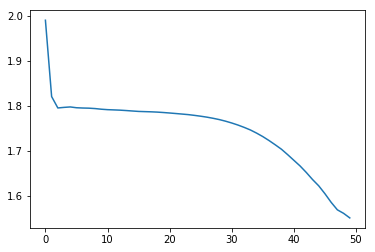

In [24]:
plt.plot(scores)

Tensor("Mean_2:0", shape=(), dtype=float32)
